In [1]:
import pandas as pd

In [220]:
df = pd.read_csv("lithograph/data/well_logs_df.csv")

In [221]:
df.head()

,Unnamed: 0,ID,DEPT,CAL,DRHO,DTC,DTS,GR,NPHI,PEF,...,RHOB,RT,RXO,THOR,URAN,CASING,CORE,MDTPOINTS,SWC,Facies
0,0,Pharo,4042.105225,8.392134,-0.023043,102.089500,226.081894,90.028061,0.288008,8.560944,...,2.512794,NaN,NaN,10.8978,2.9226,7.58,NaN,NaN,NaN,0
1,1,Pharo,4042.257568,8.395937,-0.023282,102.281807,226.514496,87.814667,0.284249,8.547519,...,2.513077,NaN,NaN,10.4623,2.9046,7.58,NaN,NaN,NaN,0
2,2,Pharo,4042.409912,8.400352,-0.023731,102.706596,227.068100,87.723587,0.284346,8.612375,...,2.510985,NaN,NaN,9.6960,3.2025,7.58,NaN,NaN,NaN,0
3,3,Pharo,4042.562500,8.404935,-0.024459,102.774597,227.730804,90.318657,0.287472,8.730247,...,2.506161,NaN,NaN,10.5635,3.2080,7.58,NaN,NaN,NaN,0
4,4,Pharo,4042.714844,8.405288,-0.024581,102.548599,227.483582,93.051201,0.290092,8.822346,...,2.501664,NaN,NaN,11.1139,3.1432,7.58,NaN,NaN,NaN,0


In [4]:
import matplotlib.pyplot as plt

In [222]:
df['DEPT']*=-1


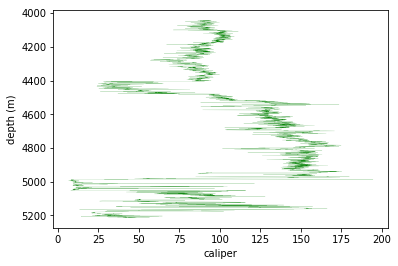

In [214]:
plt.figure()
plt.plot(df['GR'],df['DEPT'], linewidth=0.1, color='green')
plt.xlabel('caliper')
plt.ylabel('depth (m)')
plt.gca().invert_yaxis()
plt.savefig('testlog.png')
plt.show()


In [223]:
df.head()


,Unnamed: 0,ID,DEPT,CAL,DRHO,DTC,DTS,GR,NPHI,PEF,...,RHOB,RT,RXO,THOR,URAN,CASING,CORE,MDTPOINTS,SWC,Facies
0,0,Pharo,-4042.105225,8.392134,-0.023043,102.089500,226.081894,90.028061,0.288008,8.560944,...,2.512794,NaN,NaN,10.8978,2.9226,7.58,NaN,NaN,NaN,0
1,1,Pharo,-4042.257568,8.395937,-0.023282,102.281807,226.514496,87.814667,0.284249,8.547519,...,2.513077,NaN,NaN,10.4623,2.9046,7.58,NaN,NaN,NaN,0
2,2,Pharo,-4042.409912,8.400352,-0.023731,102.706596,227.068100,87.723587,0.284346,8.612375,...,2.510985,NaN,NaN,9.6960,3.2025,7.58,NaN,NaN,NaN,0
3,3,Pharo,-4042.562500,8.404935,-0.024459,102.774597,227.730804,90.318657,0.287472,8.730247,...,2.506161,NaN,NaN,10.5635,3.2080,7.58,NaN,NaN,NaN,0
4,4,Pharo,-4042.714844,8.405288,-0.024581,102.548599,227.483582,93.051201,0.290092,8.822346,...,2.501664,NaN,NaN,11.1139,3.1432,7.58,NaN,NaN,NaN,0


In [65]:
from bokeh.plotting import figure, output_file, show
import bokeh.plotting as bk
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.models import Range1d
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
from bokeh.layouts import row


In [59]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 4, 4, 5]

# output to static HTML file
output_file("lines2.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y', tools="pan,lasso_select,box_select,hover")

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

# show the results
show(p)

In [75]:
x = df['GR']
y = df['DEPT']
yr = Range1d(start=5300,end=4000)

# output to static HTML file
output_file("logGR2.html")

# tools
TOOLS = "pan,wheel_zoom,reset,hover,save"

# create a new plot with a title and axis labels
p = figure(title="Gamma Ray log", x_axis_label='GR', y_axis_label='depth', width = 200, height=1000, tools="pan,wheel_zoom,reset,hover,save")
p.grid.grid_line_alpha=0.3
p = bk.figure(y_range=yr)

# add a line renderer with legend and line thickness
p.line(x, y, legend="GR", line_width=0.5, color='green')

# p2 plot NPHI
x2 = df['NPHI']
p2 = figure(title="Neutron Porosity log", x_axis_label='NPHI', y_axis_label='depth', plot_width = 300, plot_height=1000, tools="pan,wheel_zoom,reset,hover,save")
p2.grid.grid_line_alpha=0.3
p2 = bk.figure(y_range=yr)

p2.line(x2, y, legend="NPHI", line_width=0.5, color='red')

# p3 plot RHOB
x3 = df['RHOB']
p3 = figure(title="Density log", x_axis_label='RHOB', y_axis_label='depth', plot_width = 300, plot_height=1000, x_axis_location=None, y_axis_location=None,tools=TOOLS, tooltips=[("RHOB", "@x3"), ("depth", "@y")])
p3.grid.grid_line_alpha=0.3
p3 = bk.figure(y_range=yr)

p3.line(x3, y, legend="RHOB", line_width=0.5, color='blue')
p.hover.point_policy = "follow_mouse"



# show the results
show(row(p,p2,p3))


In [224]:
x = df['GR']
y = df['DEPT']


# output to static HTML file
output_file("lines3gr.html")

# create a new plot with a title and axis labels
p = figure(title="gamma ray", x_axis_label='x', y_axis_label='y', tools="pan,ywheel_zoom,lasso_select,box_select,hover,reset", tooltips=[("GR", "@x"), ("depth", "@y")], plot_width=300, plot_height = 800)


# add a line renderer with legend and line thickness
p.line(x, y, legend="GR", line_width=0.5, color='green')

#new plot
x2 = df['RHOB']
p2 = figure(title="density", x_axis_label='x2', y_axis_label='y', tools="pan,ywheel_zoom,lasso_select,box_select,hover,reset", tooltips=[("RHOB", "@x"), ("depth", "@y")], plot_width=300, plot_height = 800)

# add a line renderer with legend and line thickness
p2.line(x2, y, legend="RHOB", line_width=0.5, color='blue')


s = row(p,p2)

# show the results
show(s)

In [164]:
depths = [1, 2.5, 3, 4, 6, 7.5, 8, 9.5, 10]
thicks = [depths[i+1]-depths[i] for i in range(8)]

In [190]:
y1

[0, 2.5, 4, 7.5]

In [254]:
import numpy as np
from bokeh.models import ColumnDataSource, Plot, LinearAxis, Grid
from bokeh.models.glyphs import Patches
from bokeh.io import curdoc, show

#input data
values = [1, 2, 1, 4, 1, 2, 4, 6, 1,3,4,1,5 ,4, 7, 5, 6, 1, 8, 4,7,6,5,8,7,6,2,9,8,7]
depths = [0, 1, 2.5, 3, 4, 6, 7.5, 8, 9.5, 10, 12, 12.4, 15, 16, 17.4, 18.2, 19, 20, 22, 22.3, 24.3,25,25.4,25.9,26,26.2,27,27.6,28,30,31]
lithologies = ["sandsone","shale","limestone", "mudstone", "dolomite", "granite", "chalk","coal","marl"]
thicks = [depths[i+1]-depths[i] for i in range((len(values)))]

#initiation of variables
y1 = []
y2= []
y3 = []
y4=[]
y5 = []
y6=[]
y7=[]
y8=[]
y9=[]
x1 = []
x2 = []
x3=[]
x4=[]
x5=[]
x6=[]
x7=[]
x8=[]
x9=[]
th = []
th2 =[]
th3=[]
th4=[]
th5=[]
th6=[]
th7=[]
th8=[]
th9=[]
lit = []
lit2 =[]
lit3 = []
lit4=[]
lit5=[]
lit6=[]
lit7=[]
lit8=[]
lit9=[]

#classes
for i in range((len(values))):
    if values[i] == 1:
        yy = depths[i]
        xx = 0*i
        ttt = thicks[i]
        th.append(ttt)
        x1.append(xx)
        y1.append(yy)
        l = lithologies[0]
        lit.append(l)
        
for i in range((len(values))):
    if values[i] == 2:
        yy = depths[i]
        xx = 0*i
        ttt = thicks[i]
        th2.append(ttt)
        x2.append(xx)
        y2.append(yy)
        l = lithologies[1]
        lit2.append(l)
        
for i in range((len(values))):
    if values[i] == 3:
        yy = depths[i]
        xx = 0*i
        x3.append(xx)
        y3.append(yy)
        ttt = thicks[i]
        th3.append(ttt)
        l = lithologies[2]
        lit3.append(l)
        
for i in range((len(values))):
    if values[i] == 4:
        yy = depths[i]
        xx = 0*i
        x4.append(xx)
        y4.append(yy)
        ttt = thicks[i]
        th4.append(ttt)
        l = lithologies[3]
        lit4.append(l)

for i in range((len(values))):
    if values[i] == 5:
        yy = depths[i]
        xx = 0*i
        x5.append(xx)
        y5.append(yy)
        ttt = thicks[i]
        th5.append(ttt)
        l = lithologies[4]
        lit5.append(l)   
        
for i in range((len(values))):
    if values[i] == 6:
        yy = depths[i]
        xx = 0*i
        x6.append(xx)
        y6.append(yy)
        ttt = thicks[i]
        th6.append(ttt)
        l = lithologies[5]
        lit6.append(l)  
        
for i in range((len(values))):
    if values[i] == 7:
        yy = depths[i]
        xx = 0*i
        x7.append(xx)
        y7.append(yy)
        ttt = thicks[i]
        th7.append(ttt)
        l = lithologies[6]
        lit7.append(l) 
        
for i in range((len(values))):
    if values[i] == 8:
        yy = depths[i]
        xx = 0*i
        x8.append(xx)
        y8.append(yy)
        ttt = thicks[i]
        th8.append(ttt)
        l = lithologies[7]
        lit8.append(l) 
        
for i in range((len(values))):
    if values[i] == 9:
        yy = depths[i]
        xx = 0*i
        x9.append(xx)
        y9.append(yy)
        ttt = thicks[i]
        th9.append(ttt)
        l = lithologies[8]
        lit9.append(l) 

# shape of the rectangle
xpts = np.array([1, -1, -1, 1])
ypts = np.array([0,0,1,1])


# coordinates of all rectangles
source3 = ColumnDataSource(dict(
        xs=[xpts+xx for i, xx in enumerate(x3)],
        ys=[ypts*m+yy for m, yy in zip(th3,y3)],
        lith=[1*ll for ll in lit3]
    )
)

source1 = ColumnDataSource(dict(
        xs=[xpts+xx for i, xx in enumerate(x1)],
        ys=[ypts*m+yy for m, yy in zip(th,y1)],
        lith=[1*ll for ll in lit]
    )
)

source2 = ColumnDataSource(dict(
        xs=[xpts+xx for i, xx in enumerate(x2)],
        ys=[ypts*m+yy for m, yy in zip(th2,y2)],
        lith=[1*ll for ll in lit2]
    )
)
source4 = ColumnDataSource(dict(
        xs=[xpts+xx for i, xx in enumerate(x4)],
        ys=[ypts*m+yy for m, yy in zip(th4,y4)],
        lith=[1*ll for ll in lit4]
    )
)
source5 = ColumnDataSource(dict(
        xs=[xpts+xx for i, xx in enumerate(x5)],
        ys=[ypts*m+yy for m, yy in zip(th5,y5)],
        lith=[1*ll for ll in lit5]
    )
)

source6 = ColumnDataSource(dict(
        xs=[xpts+xx for i, xx in enumerate(x6)],
        ys=[ypts*m+yy for m, yy in zip(th6,y6)],
        lith=[1*ll for ll in lit6]
    )
)

source7 = ColumnDataSource(dict(
        xs=[xpts+xx for i, xx in enumerate(x7)],
        ys=[ypts*m+yy for m, yy in zip(th7,y7)],
        lith=[1*ll for ll in lit7]
    )
)

source8 = ColumnDataSource(dict(
        xs=[xpts+xx for i, xx in enumerate(x8)],
        ys=[ypts*m+yy for m, yy in zip(th8,y8)],
        lith=[1*ll for ll in lit8]
    )
)

source9 = ColumnDataSource(dict(
        xs=[xpts+xx for i, xx in enumerate(x9)],
        ys=[ypts*m+yy for m, yy in zip(th9,y9)],
        lith=[1*ll for ll in lit9]
    )
)
# parameters of the figure
plot = figure(
    title="Lithologies", y_axis_label='depth (m)',
    plot_width=300, plot_height=900, y_range=(-0.5,max(depths)),
    h_symmetry=False, v_symmetry=False, min_border=0, tools="pan,ywheel_zoom,lasso_select,box_select,hover,reset", tooltips=[("Lithology", "@lith")]) #toolbar_location=None

plot.xaxis.visible = False

glyph = Patches(xs="xs", ys="ys", fill_color="yellow", line_color='blue', line_alpha=0)
glyph2 = Patches(xs="xs", ys="ys", fill_color="green", line_color='blue', line_alpha=0)
glyph3 = Patches(xs="xs", ys="ys", fill_color="red", line_color='blue', line_alpha=0)
glyph4 = Patches(xs="xs", ys="ys", fill_color="orange", line_color='blue', line_alpha=0)
glyph5 = Patches(xs="xs", ys="ys", fill_color="pink", line_color='blue', line_alpha=0)
glyph6 = Patches(xs="xs", ys="ys", fill_color="purple", line_color='blue', line_alpha=0)
glyph7 = Patches(xs="xs", ys="ys", fill_color="#7AD6BF", line_color='blue', line_alpha=0)
glyph8 = Patches(xs="xs", ys="ys", fill_color="black", line_color='blue', line_alpha=0)
glyph9 = Patches(xs="xs", ys="ys", fill_color="#C41286", line_color='blue', line_alpha=0)
plot.add_glyph(source3, glyph3)
plot.add_glyph(source1, glyph)
plot.add_glyph(source2, glyph2)
plot.add_glyph(source4, glyph4)
plot.add_glyph(source5, glyph5)
plot.add_glyph(source6, glyph6)
plot.add_glyph(source7, glyph7)
plot.add_glyph(source8, glyph8)
plot.add_glyph(source9, glyph9)
#plot.line([-1,1],[0,0],line_width=2.0,color='black')


plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

curdoc().add_root(plot)

show(plot)

len(values)

In [227]:
len(values)

13